In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from sklearn.decomposition import DictionaryLearning, MiniBatchDictionaryLearning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pickle as pk
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from sklearn.neighbors import KNeighborsClassifier
import utils


import pandas as pd



import random

random.seed(18)

save_folder = "output/"
name = 'dict_array'


## load data

In [2]:
df_params = pd.read_csv('dataset/dataset/params_npq_score.csv')
df_metrics = pd.read_csv('dataset/dataset/metrics_npq_score.csv')

# Metrics DataFrame: fluorescence evolution

In [3]:
df_params


,x_coords,y_coords,surface,algae,strain_state,monoclonal,activation_time,limit_blue,camera_heat_delay,period_SP,...,variant,length_SP,exposure,experiment,limit_blue_high,actinic_filter,number_algae,pattern_number,limit_blue_low,run_id
0,60.147059,450.264706,34,1.0,none,no,0.0,40.0,250.0,20000.0,...,NaN,200.0,170.0,a,450.0,1.0,199.0,0.0,0.0,1
1,62.222222,382.000000,27,2.0,none,no,0.0,40.0,250.0,20000.0,...,NaN,200.0,170.0,a,450.0,1.0,199.0,0.0,0.0,1
2,64.410256,402.974359,39,3.0,none,no,0.0,40.0,250.0,20000.0,...,NaN,200.0,170.0,a,450.0,1.0,199.0,0.0,0.0,1
3,68.277778,446.277778,18,4.0,none,no,0.0,40.0,250.0,20000.0,...,NaN,200.0,170.0,a,450.0,1.0,199.0,0.0,0.0,1
4,73.700000,495.075000,40,5.0,none,no,0.0,40.0,250.0,20000.0,...,NaN,200.0,170.0,a,450.0,1.0,199.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42122,430.000000,522.197183,71,70.0,none,no,0.0,40.0,250.0,20000.0,...,A6,200.0,170.0,n,450.0,1.0,74.0,2.0,0.0,160
42123,436.680851,556.744681,94,71.0,none,no,0.0,40.0,250.0,20000.0,...,A6,200.0,170.0,n,450.0,1.0,74.0,2.0,0.0,160
42124,450.661017,497.627119,59,72.0,none,no,0.0,40.0,250.0,20000.0,...,A6,200.0,170.0,n,450.0,1.0,74.0,2.0,0.0,160
42125,469.500000,359.000000,4,73.0,none,no,0.0,40.0,250.0,20000.0,...,A6,200.0,170.0,n,450.0,1.0,74.0,2.0,0.0,160


In [4]:
df_metrics

,run_id,algae,1,2,3,4,5,6,7,8,...,82,83,84,85,86,87,88,89,90,91
0,1,1,37.558824,36.911765,37.323529,38.441176,38.441176,38.441176,37.441176,36.794118,...,21.705882,21.676471,21.852941,21.264706,21.500000,21.647059,21.294118,21.176471,21.500000,21.235294
1,1,2,40.962963,40.296296,40.370370,41.185185,40.777778,40.592593,39.851852,39.666667,...,24.740741,24.962963,24.888889,24.666667,24.925926,25.296296,25.370370,25.296296,25.111111,24.851852
2,1,3,60.256410,58.974359,59.487179,59.051282,58.948718,60.846154,61.871795,61.538462,...,31.333333,31.025641,30.948718,31.128205,31.076923,30.923077,30.948718,30.692308,30.846154,30.948718
3,1,4,36.444444,35.611111,35.333333,36.222222,36.333333,35.833333,35.944444,34.944444,...,20.277778,20.222222,19.833333,20.055556,19.666667,19.777778,19.666667,19.777778,19.666667,20.000000
4,1,5,39.850000,40.725000,44.350000,46.225000,48.175000,50.250000,51.275000,52.625000,...,29.725000,29.425000,29.375000,29.400000,29.175000,29.125000,29.175000,29.075000,29.000000,28.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42122,160,70,29.563380,24.859155,25.126761,24.830986,24.859155,25.352113,25.197183,25.000000,...,26.845070,26.802817,26.549296,26.704225,26.802817,26.802817,26.746479,26.690141,27.169014,27.225352
42123,160,71,31.053191,27.691489,27.968085,27.989362,27.989362,27.893617,27.829787,27.404255,...,28.617021,28.744681,28.904255,29.244681,29.010638,29.138298,28.882979,29.159574,28.840426,29.063830
42124,160,72,27.423729,24.508475,24.864407,24.593220,24.389831,24.237288,23.966102,23.881356,...,24.152542,23.677966,24.050847,24.423729,23.830508,23.949153,24.135593,24.016949,23.915254,24.000000
42125,160,73,20.750000,19.250000,20.000000,20.000000,20.750000,20.250000,20.000000,19.500000,...,19.500000,18.500000,19.750000,19.500000,20.250000,19.250000,19.750000,19.250000,19.500000,19.500000


# Params DataFrame: experimental parameters

In [5]:
np.unique(df_params["strain_state"])

array(['Pop-0', 'Pop-qE', 'Pop-qI', 'Pop-qT', 'cc124', 'none', 'wt4'],
      dtype=object)

In [6]:
df_params.loc[df_params["strain_state"]=="cc124"]

,x_coords,y_coords,surface,algae,strain_state,monoclonal,activation_time,limit_blue,camera_heat_delay,period_SP,...,variant,length_SP,exposure,experiment,limit_blue_high,actinic_filter,number_algae,pattern_number,limit_blue_low,run_id
26596,9.000000,163.148148,27,1.0,cc124,no,81.9,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,357.0,3.0,0.0,107
26597,13.235294,513.529412,51,2.0,cc124,no,81.9,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,357.0,3.0,0.0,107
26598,13.791667,527.416667,48,3.0,cc124,no,81.9,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,357.0,3.0,0.0,107
26599,15.333333,164.428571,42,4.0,cc124,no,81.9,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,357.0,3.0,0.0,107
26600,22.000000,493.836735,49,5.0,cc124,no,81.9,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,357.0,3.0,0.0,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30771,498.500000,650.000000,6,529.0,cc124,no,245.7,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,533.0,3.0,0.0,115
30772,501.000000,569.000000,5,530.0,cc124,no,245.7,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,533.0,3.0,0.0,115
30773,499.437500,573.750000,16,531.0,cc124,no,245.7,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,533.0,3.0,0.0,115
30774,503.444444,539.388889,18,532.0,cc124,no,245.7,40.0,250.0,20000.0,...,NaN,200.0,170.0,h,450.0,1.0,533.0,3.0,0.0,115


## Select experiments labelled 

In [7]:
state_list = ['Pop-qE', 'Pop-qI', 'Pop-qT', 'Pop-0', "wt4", "cc124"]
idx = df_params['strain_state'].isin(state_list)*((df_params['surface']>5))
df_params = df_params[idx]
df_metrics = df_metrics[idx]

## Dataset matrix

In [8]:
mat =[]
idi = []

for i, st in  enumerate(state_list):
    y = df_metrics[df_params["strain_state"]==st]
    idi.append(y.index)
    y= y.drop(columns=['run_id', 'algae'])
    mat.append(y)



# Outliers

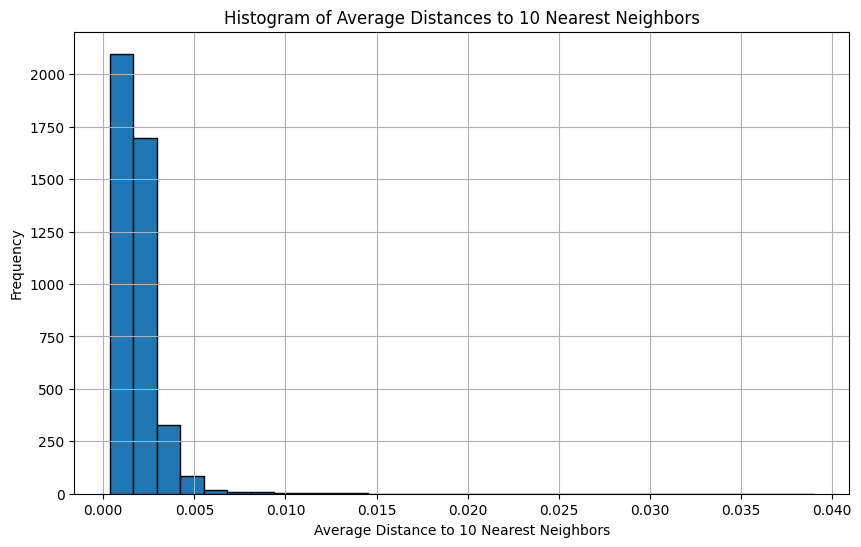

In [9]:
from sklearn.neighbors import KDTree

matrix = np.concatenate(mat)
matrix = matrix/np.expand_dims(np.sum(matrix, axis = 1),1)
# Build KD-Tree
kdtree = KDTree(matrix)#, leaf_size=30, metric='euclidean')

# Compute distances to the 10 nearest neighbors
distances, indices = kdtree.query(matrix, k=10)  # k=11 because the first neighbor is the point itself

# Compute the average distance to the 10 nearest neighbors (excluding the point itself)
avg_distances = distances.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(avg_distances, bins=30, edgecolor='k')
plt.xlabel('Average Distance to 10 Nearest Neighbors')
plt.ylabel('Frequency')
plt.title('Histogram of Average Distances to 10 Nearest Neighbors')
plt.grid(True)
plt.show()

In [10]:
# Manually set a threshold D
D = 0.005  # Example threshold, adjust as needed
print(len(matrix[avg_distances>D]))
# Remove outliers
filtered_indices = np.concatenate(idi)
filtered_indices = filtered_indices[avg_distances>D]
filtered_indices

68


array([ 3211,  3218,  3225,  3239,  3240,  3246,  3261,  3264,  3266,
        3285,  3292,  3295,  3300,  3304,  3307,  3314,  3315,  3320,
        5093,  5095,  5107,  5148,  5173,  5200,  5215,  5217, 16255,
       16271, 16272, 16279, 16283, 16298, 16309, 16319, 16344, 16349,
       16364, 16366, 16367, 16385, 16398, 16399, 16400, 16421, 16435,
       16452, 16456, 16458, 16459, 16465,  2630, 14671, 14842, 14884,
       32041, 15353, 38487, 40890, 26632, 28279, 28308, 28320, 28476,
       28581, 28586, 28595, 30325, 30478])

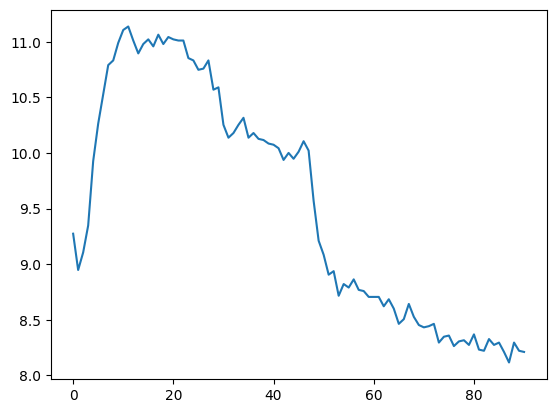

In [11]:
df_metrics = df_metrics.drop(filtered_indices)
df_params = df_params.drop(filtered_indices)
df = df_metrics.drop(columns=['run_id', 'algae'])
matrix = df.to_numpy()
plt.figure()
plt.plot(matrix[100])


pulses_array = matrix
selected_labels = df_params[['strain_state']]
selected_labels = selected_labels.to_numpy().T[0]

## Display the traces

0 430
1 449
2 935
3 432
4 858
5 1083


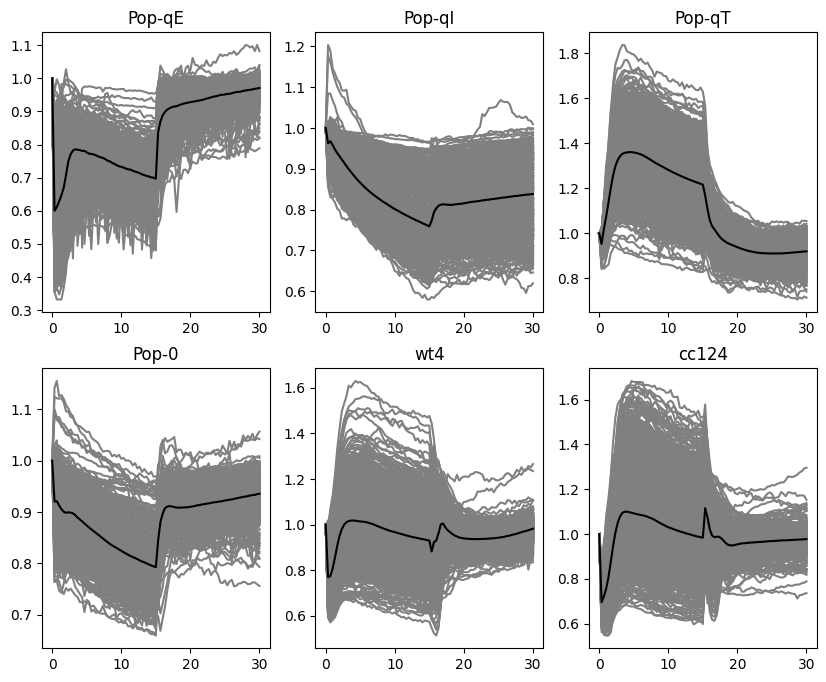

In [12]:

plt.figure(figsize = (10, 8))
for i, st in  enumerate(state_list):

    pos = np.array(selected_labels).astype(str) == st
    y = pulses_array[pos]
    y = np.array(y)
    y = y/y[:,0:1]
    print(i, len(y))
    plt.subplot(2,3,i+1)
    plt.plot(np.linspace(0, 30, 91), y.T, color  = "grey")
    plt.plot(np.linspace(0, 30, 91), np.mean(y, axis = 0), color  = "black")

    plt.title(st)



## Data pre-processing

In [13]:
def random_selection(selected_labels, classes = ["Pop-0", "Pop-qI", "Pop-qE", "Pop-qT"], mini=True, class_size = 0, verbose=True):
    p = []
    for i in classes:
            S = np.sum(selected_labels == i)
            if verbose:
                print(S)
            p.append(S)
    p = np.array(p)

    if mini==True:
        train_number=np.min(p)
    else:
        train_number = class_size

    idx = np.copy(selected_labels)*0
    idx = idx.astype(bool)
    
    np.random.seed(4)
    for ni, i in enumerate(classes):
        a  = selected_labels==i
        b = np.random.rand(len(idx))<=train_number/p[ni]
        idx += np.array(a)*np.array(b)
    idx = idx.astype(bool)
    
    return idx

def pre_process_pulses(pulses_array, save_folder, name, normalize="proba", center = False):
    correct_pulses = pulses_array 

    M_dico = correct_pulses.mean()
    S_dico = correct_pulses.std()
    
    if center:
        correct_pulses -= M_dico  
    if normalize == "F0":
        correct_pulses = correct_pulses/correct_pulses[:,0:1]
    elif normalize== "proba":
        correct_pulses = correct_pulses/np.expand_dims(np.sum(correct_pulses, axis = 1), 1)
    elif normalize == "std":
        correct_pulses /= S_dico
        
    np.savetxt(save_folder + "/%s_M_dict.csv"%name,np.array([M_dico]))
    np.savetxt(save_folder + "/%s_S_dict.csv"%name,np.array([S_dico]))
    return correct_pulses




# Dictionary learning

## Training parameters

In [14]:
fit_method = "lars"
tr_method = "lasso_lars"
tr_alpha = 1e-6
fit_alpha = 1e-6
k = 10
N = 300
n_transform_nonzero = 4
N_iter = 10000
minib = 64
n_LDA=300
n_tr=0
D0=None

## Training data

In [15]:
idx = random_selection(selected_labels, mini=True, class_size = N)

correct_pulses =  pre_process_pulses(pulses_array, save_folder, name, normalize="proba", center = False)
train_pulses = correct_pulses[idx]
train_labels = selected_labels[idx]

432
449
430
935


## Learning the dictionary

In [16]:
dict_learner = MiniBatchDictionaryLearning(n_components=k, 
                                           batch_size=minib, 
                                           transform_algorithm=tr_method, 
                                           alpha = fit_alpha,
                                           transform_alpha=tr_alpha, 
                                           transform_n_nonzero_coefs= n_transform_nonzero,
                                           transform_max_iter=N_iter,
                                           n_jobs=-1, 
                                           dict_init=D0, 
                                          random_state = 37)

init_train_pulses = np.copy(train_pulses)
X_transform = dict_learner.fit_transform(train_pulses)
dict_array = dict_learner.transform(correct_pulses)
pk.dump(dict_learner, open(save_folder + "/dico.pkl","wb"))



In [17]:
train_pulses = X_transform


## LDA

In [18]:

def make_lda(n_components, train_data, Y_train_label, verbose=True):
    lda = LinearDiscriminantAnalysis(n_components = n_components)
    M = train_data.mean(axis = 0)
    S = train_data.std(axis = 0)   
    train_data = (train_data - M)/S
    lda.fit(train_data,Y_train_label)
    X = lda.transform(train_data)
    if verbose:
        print(X.shape)
        print("LDA components:")
        #lt.matshow(lda.scalings_)
        plt.figure()
        print("LDA explained variance:")
        plt.semilogy(lda.explained_variance_ratio_)
        plt.ylabel("eignevalue")
        plt.xlabel("component")

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:,2], c=Y_train_label)##
        #plt.plot(boundary[:,0], boundary[:,1], c = 'k')
        plt.xlabel("LD1")
        plt.ylabel("LD2")
    return lda, M, S



(1733, 3)
LDA components:
LDA explained variance:


(1733, 10)

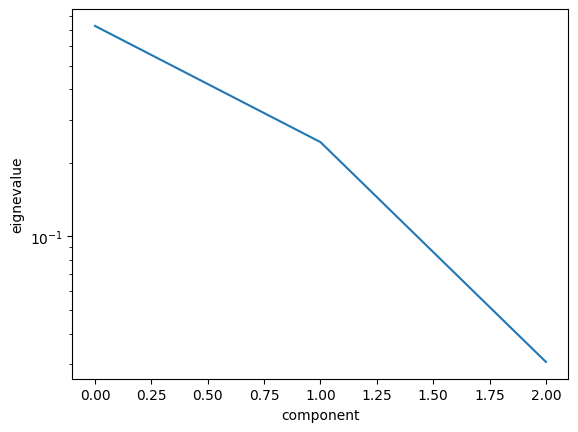

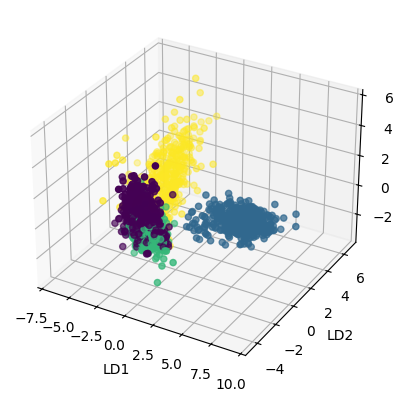

In [19]:
label_to_int = {'Pop-qI': 0, 'Pop-qT': 1, 'Pop-0': 2, 'Pop-qE': 3}
numeric_labels = [label_to_int[label] for label in train_labels]

lda, M_lda, S_lda = make_lda(3, train_pulses, numeric_labels, 'eigen')

train_pulses.shape

(1733, 10)
0
1
2
3
428
860
1290
443
432
860
1290


Text(0.5, 0.5, 'LD2')

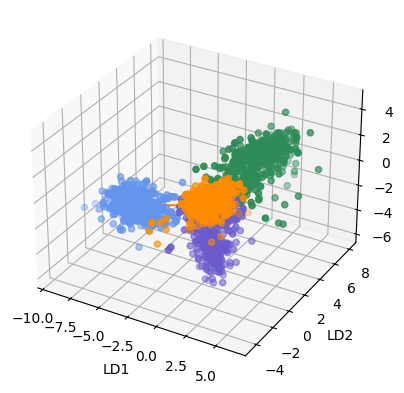

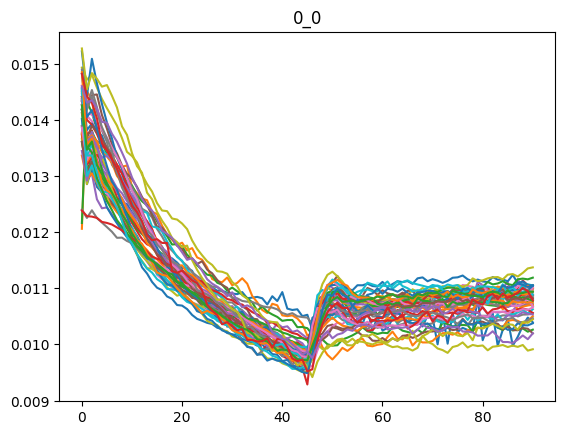

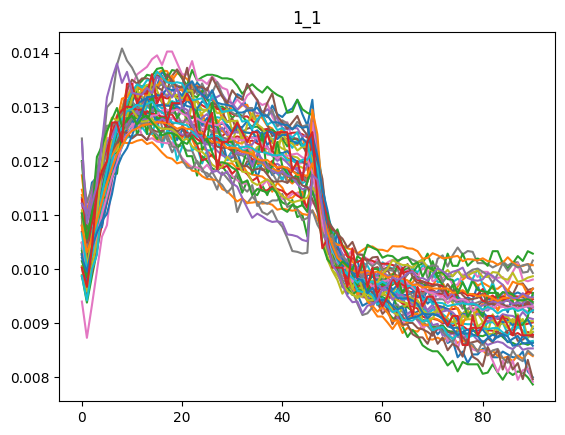

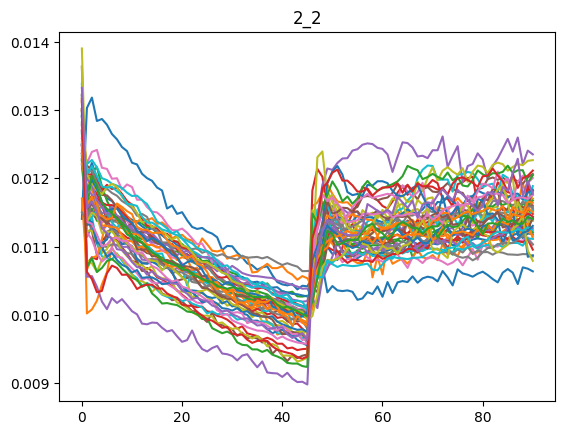

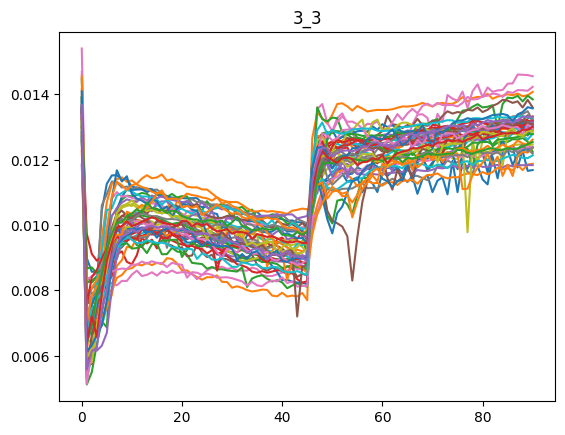

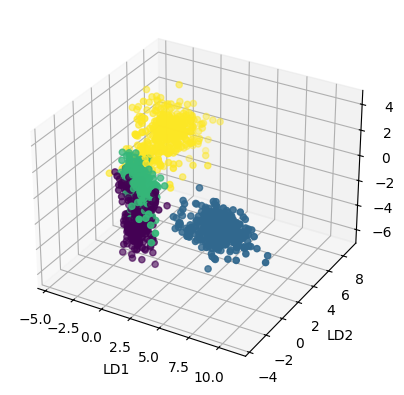

In [20]:

try:
    lda.scalings_ = lda.components_ .T
except:
    pass


def get_principal_axis(cloud_class):
    centered_points = cloud_class - np.mean(cloud_class, axis=0)
    covariance_matrix = np.cov(centered_points, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    first_principal_component = eigenvectors[:, -1]
    return first_principal_component
  
def reorient_axis(train_labels, train_pulses, lda, M_lda, S_lda, plotly_folder):
    train_labels = np.array(train_labels)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    PC = []
    mean_pos = []
    print(train_pulses.shape)
    XT = lda.transform((train_pulses - M_lda)/S_lda)
            
    for iii, label in enumerate(np.unique(train_labels)):
        print(label)
        ind = train_labels == label
        X = XT[ind]
        c = correct_pulses[idx]
        YY = c[ind]
        
        PC.append(get_principal_axis(X))
        plt.figure()
        plt.plot(YY[0:45].T)
        plt.title("%d_%d"%(iii, label))
        
    ax0 = PC[1]
    ax1 = PC[3]
    ax2 = np.cross(ax0, ax1)
    

    B = np.array([ax0, ax1, ax2]).T
    R = np.linalg.inv(B)
    
    
    XT = np.dot(XT, R.T)
    
    
    for iii, label in enumerate(np.unique(train_labels)):
        ind = train_labels == label
        X = XT[ind]
        ax.scatter(X[:, 0], X[:, 1], X[:,2], color = ['slateblue', 'cornflowerblue', 'darkorange', 'seagreen'][iii])##
        mean_pos.append(np.mean(X, axis = 0))

    {'Pop-qI': 0, 'Pop-qT': 1, 'Pop-0': 2, 'Pop-qE': 3}
        
    origin_pos = []
    for npq, labels in enumerate([[0,2,3], #qT -> tous les stt7
                  [1], #qE -> stt7 non activé non photoinhibé
                  [2, 0, 3]]): #qI -> stt7 activé/non-activé photoinnhibé + wt4 photoinhibé
        ind = train_labels*0
        for label in labels:
            ind += train_labels == label
            print(np.sum(ind))
        
        X = XT[ind==1]

        origin_pos.append(np.mean(X[:,npq:npq+1]))
    
    origin_pos = np.array(origin_pos)
    ax.scatter(origin_pos[0], origin_pos[1], origin_pos[2], s = 40)
    for i in range(4):
        ax.plot([mean_pos[i][0], origin_pos[0]], 
                 [mean_pos[i][1], origin_pos[1]], 
                 [mean_pos[i][2], origin_pos[2]])
        


    Tr = lda.scalings_[:,:3]

        
    
        
    return Tr, R, mean_pos, origin_pos


Tr, R,  mean, origin = reorient_axis(numeric_labels, train_pulses, lda, M_lda, S_lda, save_folder)


def transform_data(train_pulses, M_lda, S_lda, Tr, R, origin):
    XT = (train_pulses - M_lda)/S_lda
    XT = np.dot(XT, Tr)
    XT = np.dot(XT, R.T) 
    XT = XT - origin
    XT[:,0] = -XT[:,0]
    #XT[:,1] = -XT[:,1]
    return XT


XT = transform_data(train_pulses, M_lda, S_lda, Tr, R, origin)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(XT[:, 0], XT[:, 1], XT[:,2], c=numeric_labels)##
#plt.plot(boundary[:,0], boundary[:,1], c = 'k')
plt.xlabel("LD1")
plt.ylabel("LD2")




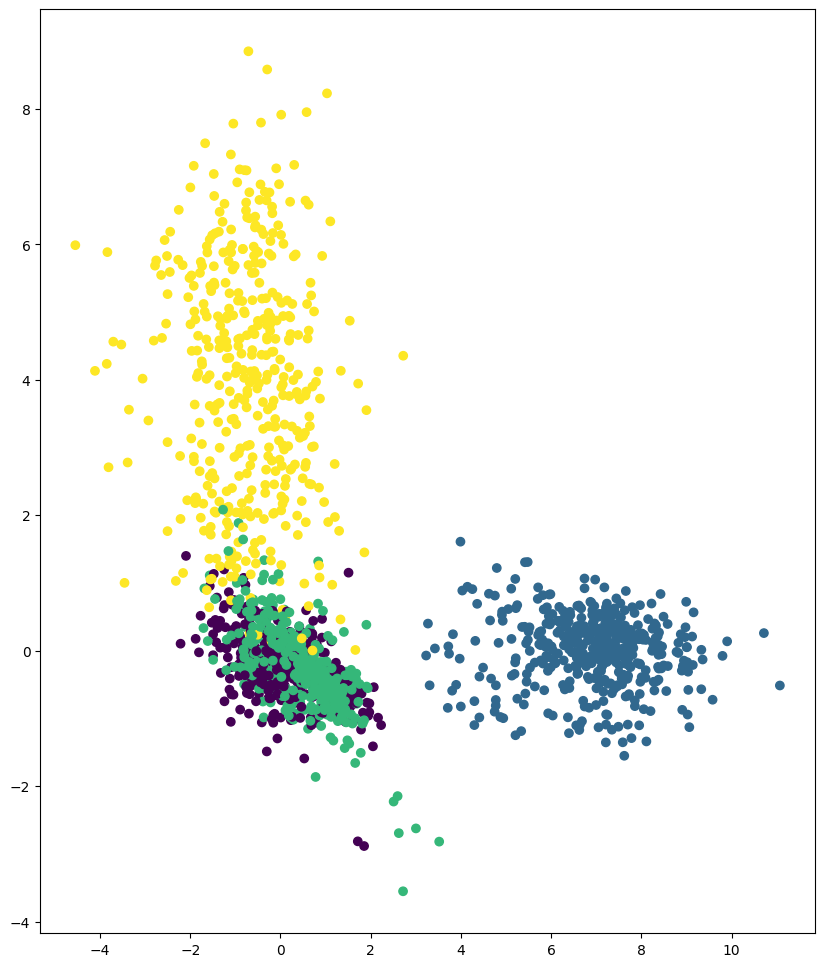

In [21]:
plt.figure(figsize = (10, 12))
plt.scatter(XT[:,0], XT[:,1],  c=numeric_labels)

In [22]:


def save_ouptut(name, plotly_folder, Tr, R, M_lda, S_lda, lda, origin, saveX=True):
    np.savetxt(plotly_folder + "%s_M_lda.csv"%name,M_lda)
    np.savetxt(plotly_folder + "%s_S_lda.csv"%name,S_lda)
    np.savetxt(plotly_folder + "%s_Tr.csv"%name, Tr)
    np.savetxt(plotly_folder + "%s_R.csv"%name, R)
    np.savetxt(plotly_folder + "%s_origin.csv"%name, origin)

    pk.dump(lda, open(plotly_folder + "%s_lda.pkl"%name,"wb"))


save_ouptut(name, save_folder, Tr, R, M_lda, S_lda, lda, origin)


In [23]:
full_transform = dict_learner.transform(correct_pulses)
full_scores = transform_data(full_transform, M_lda, S_lda, Tr, R, origin)


## All wt4 cells overlayed following step-wise activation

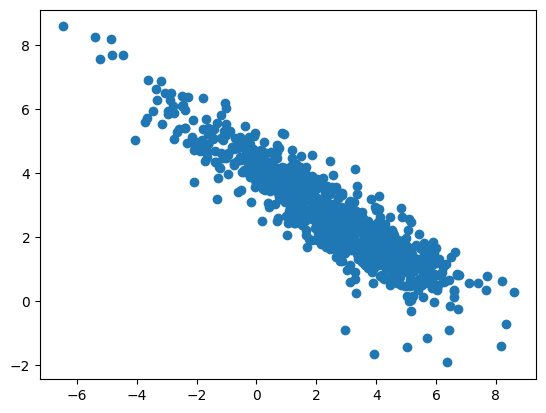

In [24]:

selected_labels = df_params[['strain_state']]
pos = np.array(selected_labels == "wt4")
sel = full_scores[pos[:,0]]
plt.plot(sel[:,0], sel[:,1], 'o')

## All cc124 cells overlayed following step-wise activation

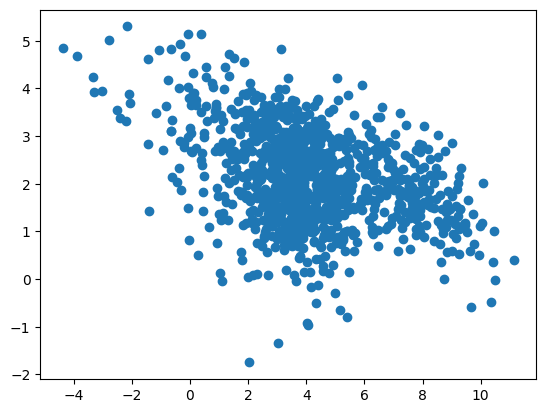

In [25]:

selected_labels = df_params[['strain_state']]
pos = np.array(selected_labels == "cc124")
sel = full_scores[pos[:,0]]
plt.plot(sel[:,0], sel[:,1], 'o')